<a href="https://colab.research.google.com/github/Ya-abba/AES-Encryption-Python/blob/master/autoencoder_7_4_symbol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libs
import numpy as np
import tensorflow as tf
from keras.layers import Input, Dense, GaussianNoise
from keras.models import Model
from keras import regularizers
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
import random as rn

In [ ]:
# defining parameters
M = 16 
k = np.log2(M)
k = int(k)
print ('M:',M,'k:',k)

M: 16 k: 4


In [ ]:
#generating data of size N
N = 10000
label = np.random.randint(M,size=N)

In [ ]:
# creating one hot encoded vectors
data = []
for i in label:
    temp = np.zeros(M)
    temp[i] = 1
    data.append(temp)

In [ ]:
data = np.array(data)
print (data.shape)

(10000, 16)


In [ ]:
temp_check = [17,23,45,67,89,96,72,250,350]
for i in temp_check:
    print(label[i],data[i])

11 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
6 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
4 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
5 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
2 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
12 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
13 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
14 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
14 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]


In [ ]:
R = 4/7
n_channel = 7
print (int(k/R))
input_signal = Input(shape=(M,))
encoded = Dense(M, activation='relu')(input_signal)
encoded1 = Dense(n_channel, activation='linear')(encoded)
encoded2 = BatchNormalization()(encoded1)

EbNo_train = 5.01187 #  coverted 7 db of EbNo
encoded3 = GaussianNoise(np.sqrt(1/(2*R*EbNo_train)))(encoded2)

decoded = Dense(M, activation='relu')(encoded3)
decoded1 = Dense(M, activation='softmax')(decoded)

autoencoder = Model(input_signal, decoded1)
#sgd = SGD(lr=0.001)
autoencoder.compile(optimizer='adam', loss='categorical_crossentropy')

7


In [ ]:
print (autoencoder.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 16)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_10 (Dense)             (None, 7)                 119       
_________________________________________________________________
batch_normalization_3 (Batch (None, 7)                 28        
_________________________________________________________________
gaussian_noise_3 (GaussianNo (None, 7)                 0         
_________________________________________________________________
dense_11 (Dense)             (None, 16)                128       
_________________________________________________________________
dense_12 (Dense)             (None, 16)                272       
Total para

In [ ]:
N_val = 1500
val_label = np.random.randint(M,size=N_val)
val_data = []
for i in val_label:
    temp = np.zeros(M)
    temp[i] = 1
    val_data.append(temp)
val_data = np.array(val_data)

In [ ]:
autoencoder.fit(data, data,
                epochs=17,
                batch_size=300,
                validation_data=(val_data, val_data))

Train on 10000 samples, validate on 1500 samples
Epoch 1/17
10000/10000 [==============================] - 0s - loss: 2.4397 - val_loss: 2.6391
Epoch 2/17
10000/10000 [==============================] - 0s - loss: 1.9941 - val_loss: 2.4919
Epoch 3/17
10000/10000 [==============================] - 0s - loss: 1.6196 - val_loss: 2.2910
Epoch 4/17
10000/10000 [==============================] - 0s - loss: 1.2889 - val_loss: 2.0355
Epoch 5/17
10000/10000 [==============================] - 0s - loss: 0.9983 - val_loss: 1.7330
Epoch 6/17
10000/10000 [==============================] - 0s - loss: 0.7578 - val_loss: 1.4023
Epoch 7/17
10000/10000 [==============================] - 0s - loss: 0.5730 - val_loss: 1.0829
Epoch 8/17
10000/10000 [==============================] - 0s - loss: 0.4313 - val_loss: 0.7943
Epoch 9/17
10000/10000 [==============================] - 0s - loss: 0.3188 - val_loss: 0.5534
Epoch 10/17
10000/10000 [==============================] - 0s - loss: 0.2373 - val_loss: 0.3709


In [ ]:
from keras.models import load_model
#autoencoder.save('4_7_symbol_autoencoder_v_best.model')

In [ ]:
#autoencoder_loaded = load_model('4_7_symbol_autoencoder_v_best.model')

In [ ]:
encoder = Model(input_signal, encoded2)

In [ ]:
encoded_input = Input(shape=(n_channel,))

deco = autoencoder.layers[-2](encoded_input)
deco = autoencoder.layers[-1](deco)
# create the decoder model
decoder = Model(encoded_input, deco)

In [ ]:
N = 45000
test_label = np.random.randint(M,size=N)
test_data = []

for i in test_label:
    temp = np.zeros(M)
    temp[i] = 1
    test_data.append(temp)
    
test_data = np.array(test_data)

In [ ]:
temp_test = 6
print (test_data[temp_test][test_label[temp_test]],test_label[temp_test])

1.0 13


In [ ]:
autoencoder

In [ ]:
def frange(x, y, jump):
  while x < y:
    yield x
    x += jump

In [ ]:
EbNodB_range = list(frange(-4,8.5,0.5))
ber = [None]*len(EbNodB_range)
for n in range(0,len(EbNodB_range)):
    EbNo=10.0**(EbNodB_range[n]/10.0)
    noise_std = np.sqrt(1/(2*R*EbNo))
    noise_mean = 0
    no_errors = 0
    nn = N
    noise = noise_std * np.random.randn(nn,n_channel)
    encoded_signal = encoder.predict(test_data) 
    final_signal = encoded_signal + noise
    pred_final_signal =  decoder.predict(final_signal)
    pred_output = np.argmax(pred_final_signal,axis=1)
    no_errors = (pred_output != test_label)
    no_errors =  no_errors.astype(int).sum()
    ber[n] = no_errors / nn 
    print ('SNR:',EbNodB_range[n],'BER:',ber[n])

SNR: -4 BER: 0.341422222222
SNR: -3.5 BER: 0.306422222222
SNR: -3.0 BER: 0.266755555556
SNR: -2.5 BER: 0.233888888889
SNR: -2.0 BER: 0.195488888889
SNR: -1.5 BER: 0.168711111111
SNR: -1.0 BER: 0.132488888889
SNR: -0.5 BER: 0.109
SNR: 0.0 BER: 0.0812444444444
SNR: 0.5 BER: 0.0620222222222
SNR: 1.0 BER: 0.0431555555556
SNR: 1.5 BER: 0.0314444444444
SNR: 2.0 BER: 0.0214222222222
SNR: 2.5 BER: 0.0152888888889
SNR: 3.0 BER: 0.00926666666667
SNR: 3.5 BER: 0.00515555555556
SNR: 4.0 BER: 0.00328888888889
SNR: 4.5 BER: 0.00164444444444
SNR: 5.0 BER: 0.000644444444444
SNR: 5.5 BER: 0.000355555555556
SNR: 6.0 BER: 0.000133333333333
SNR: 6.5 BER: 0.000155555555556
SNR: 7.0 BER: 4.44444444444e-05
SNR: 7.5 BER: 2.22222222222e-05
SNR: 8.0 BER: 0.0


In [ ]:
import matplotlib.pyplot as plt
plt.plot(EbNodB_range, ber, 'bo',label='Autoencoder(7,4)')
#plt.plot(list(EbNodB_range), ber_theory, 'ro-',label='BPSK BER')
plt.yscale('log')
plt.xlabel('SNR Range')
plt.ylabel('Block Error Rate')
plt.grid()
plt.legend(loc='upper right',ncol = 1)

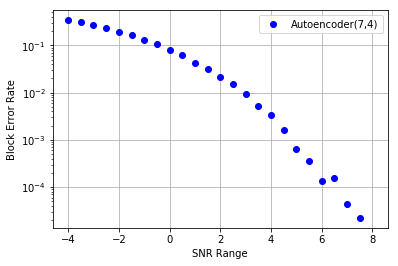

In [ ]:
plt.savefig('AutoEncoder_7_4_BER_matplotlib')
plt.show()